------------------------------------------- Initial Data Inspection ---------------------------------------------------
       brand_name           pants_description   price     MRP  \
0           WROGN  Men Loose Fit Cotton Jeans  1374.0  2499.0   
1  Flying Machine          Men Slim Fit Jeans  1829.0  2999.0   
2        Roadster       Men Pure Cotton Jeans   974.0  2499.0   
3      Bene Kleed     Relaxed Fit Denim Jeans   873.0  2299.0   
4           Levis      Men 511 Slim Fit Jeans  1478.0  2899.0   

   discount_percent  ratings  number_of_ratings  
0              0.45      4.2               57.0  
1              0.39      4.6                5.0  
2              0.61      3.6             1100.0  
3              0.62      4.0             4800.0  
4              0.49      4.3              264.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52120 entries, 0 to 52119
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             ---------

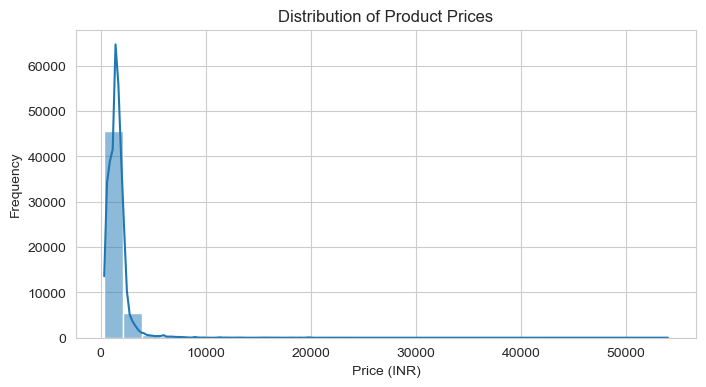

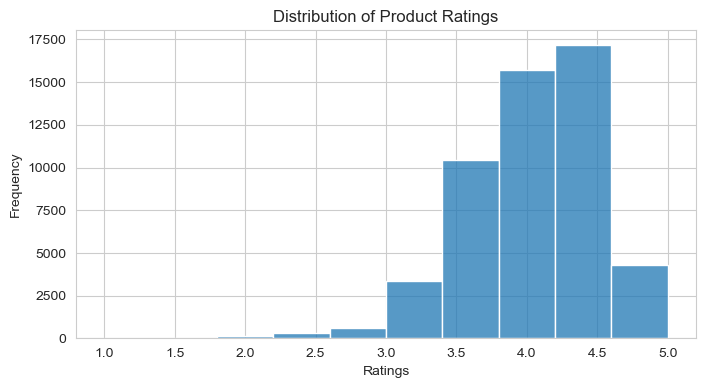


--- Top 10 Brands by Number of Ratings ---
brand_name
Roadster                     653454.0
WROGN                        432650.0
United Colors of Benetton    421810.0
Flying Machine               378058.0
HIGHLANDER                   335962.0
Levis                        279900.0
FUGAZEE                      124526.0
The Indian Garage Co          99807.0
HERE&NOW                      83125.0
Calvin Klein Jeans            81786.0
Name: number_of_ratings, dtype: float64


C:\Users\srial\AppData\Local\Temp\ipykernel_30212\253265400.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')


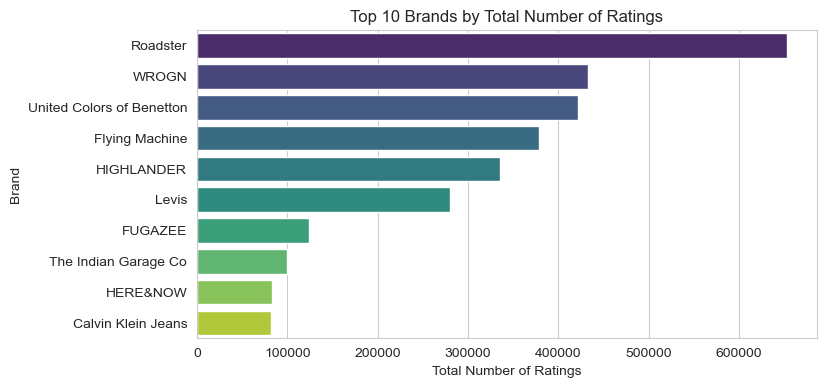

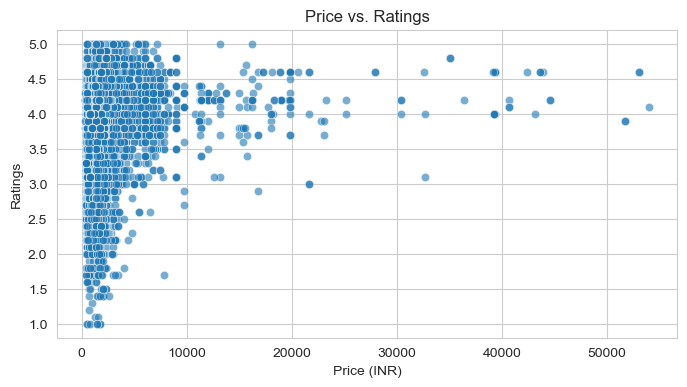

C:\Users\srial\AppData\Local\Temp\ipykernel_30212\253265400.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_discount_by_brand.values, y=avg_discount_by_brand.index, palette='crest')


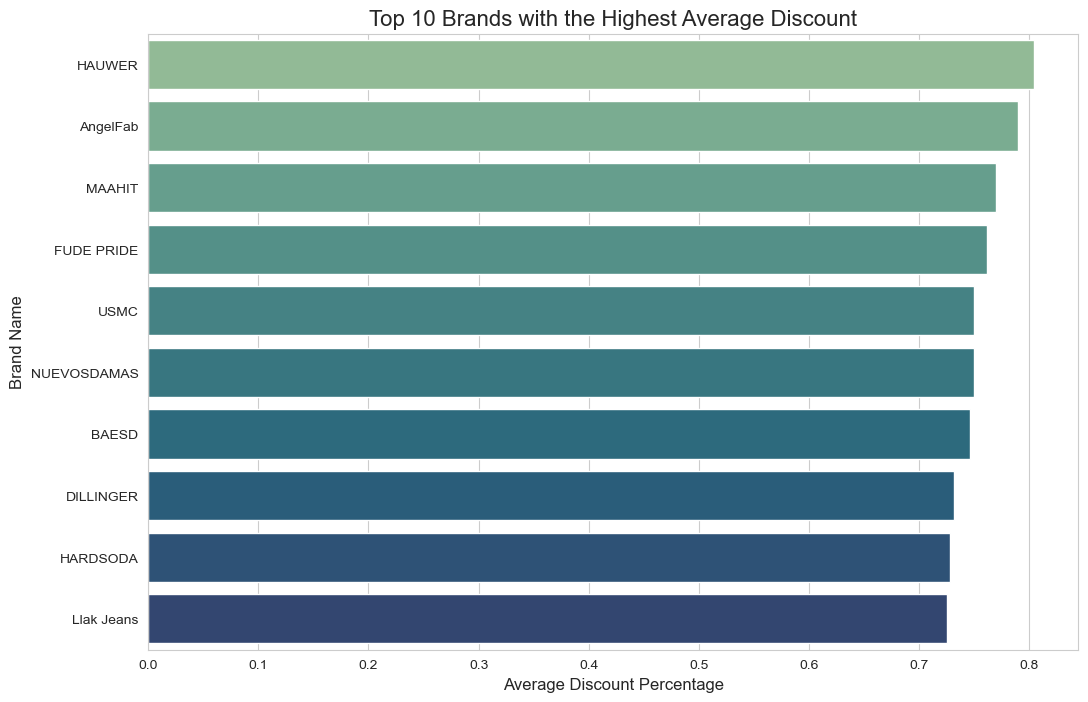

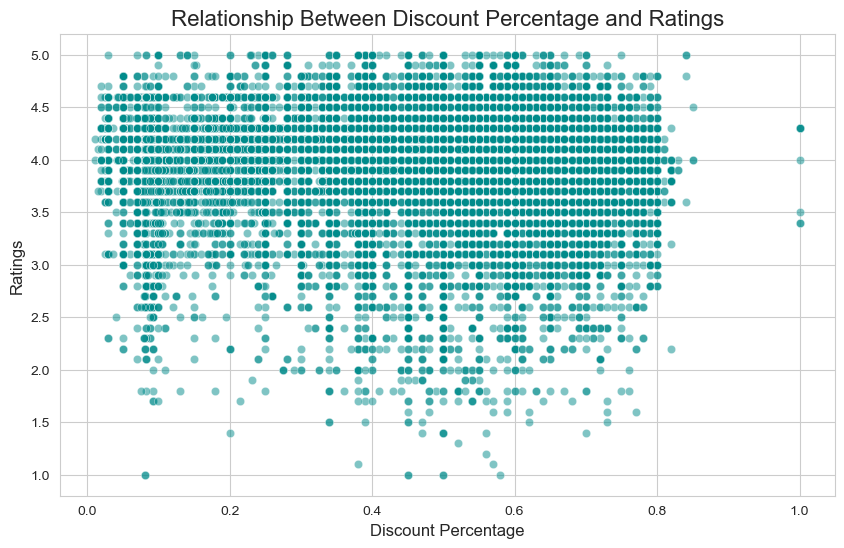

C:\Users\srial\AppData\Local\Temp\ipykernel_30212\253265400.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_tier', y='discount_percent', data=df, palette='Spectral')


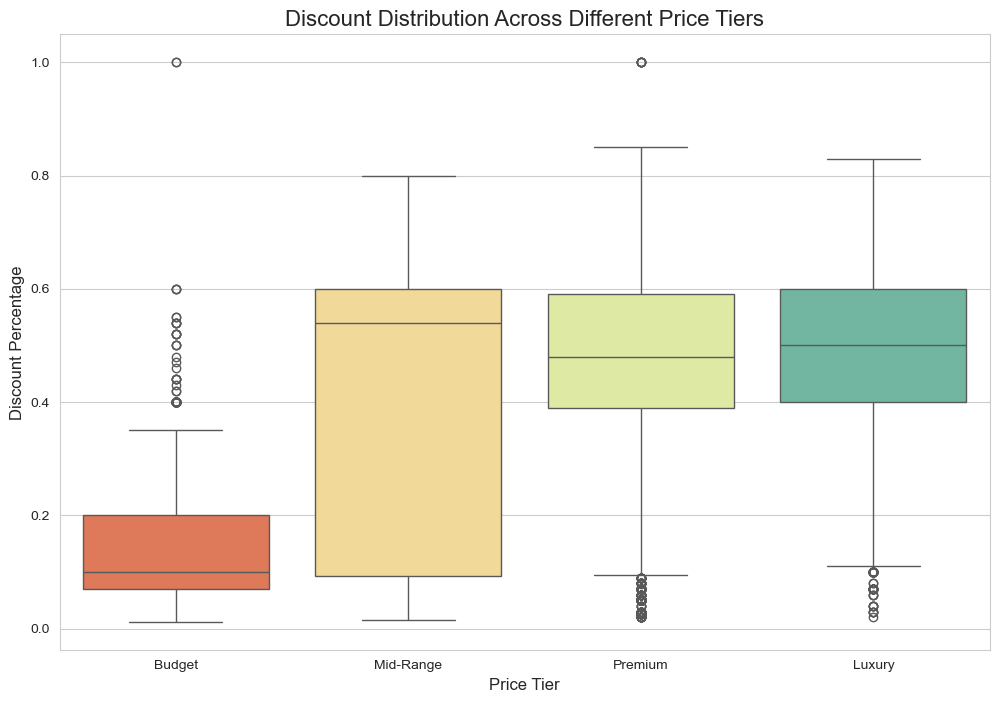

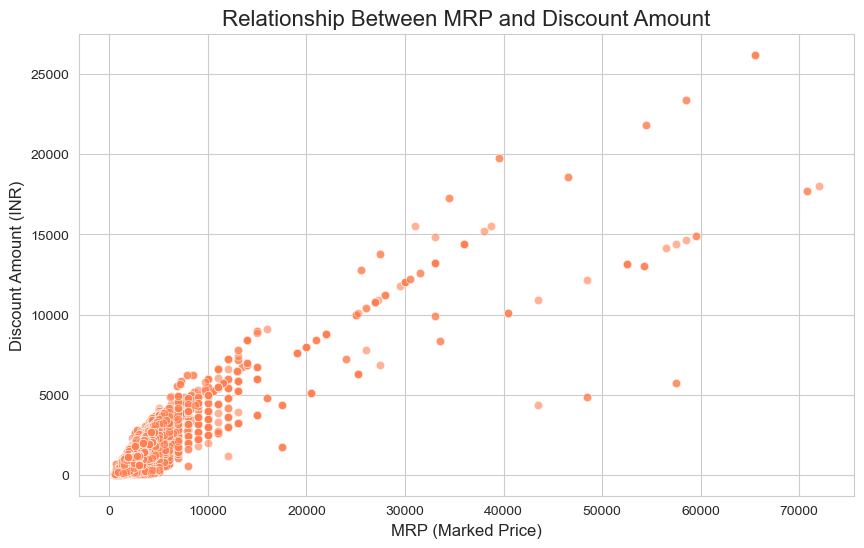

In [31]:
import pandas as pd
import numpy as np

# ------------------------------------- Data Loading and Initial Inspection ----------------------------------------------

# Loading the dataset 
df = pd.read_csv("C:/Users/srial/OneDrive/Desktop/Myntra_data_analysis/Myntra_DataSet/myntra_dataset_ByScraping.csv")

# Display the first 5 rows of the DataFrame to get a feel for the data
print("------------------------------------------- Initial Data Inspection ---------------------------------------------------")
print(df.head())

# Getting a concise summary of the DataFrame, including data types and non-null values
print(df.info())

# Checking for duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# Data Cleaning

# Handling the discount_percent column
df['discount_percent'] = df['discount_percent'].astype(str).str.replace(',', '').astype(float)
df['discount_percent'] = df['discount_percent'].apply(lambda x: x / 100 if x > 1 else x)

#Checking Missing values per column
missing = df.isnull().sum()
print(missing)

# Converting ratings and number_of_ratings columns to numeric.
# The 'errors='coerce'' argument will turn any non-numeric values into NaN.
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
df['number_of_ratings'] = pd.to_numeric(df['number_of_ratings'], errors='coerce')


# Handle missing values (e.g., in ratings and number_of_ratings)
df['ratings'] = df['ratings'].fillna(0)
df['number_of_ratings'] = df['number_of_ratings'].fillna(0)


# Drop if any remaining rows with missing values
df.dropna(inplace=True)

# Re-checking the DataFrame info to confirm the changes
print("\n--- DataFrame Info After Cleaning ---")
print(df.info())


# Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Setting a style for the plots for better aesthetics
sns.set_style("whitegrid")

# Creating new columns for analysis
df['discount_amount'] = df['MRP'] * df['discount_percent']
df['price_difference'] = df['MRP'] - df['price']

# Analyzing the price distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()

# Analyzing the distribution of ratings
plt.figure(figsize=(8, 4))
sns.histplot(df['ratings'], bins=10, kde=False)
plt.title('Distribution of Product Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

# Finding the top 10 most popular brands by number of ratings
top_brands = df.groupby('brand_name')['number_of_ratings'].sum().sort_values(ascending=False).head(10)
print("\n--- Top 10 Brands by Number of Ratings ---")
print(top_brands)

# Visualizing the top 10 brands
plt.figure(figsize=(8, 4))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')
plt.title('Top 10 Brands by Total Number of Ratings')
plt.xlabel('Total Number of Ratings')
plt.ylabel('Brand')
plt.show()

# Analyzing the relationship between ratings and price
plt.figure(figsize=(8, 4))
sns.scatterplot(x='price', y='ratings', data=df, alpha=0.6)
plt.title('Price vs. Ratings')
plt.xlabel('Price (INR)')
plt.ylabel('Ratings')
plt.show()


# ----------------------------------- Task 1: Brand vs. Discounts ----------------------------------------------------
# Calculate the average discount for each brand
avg_discount_by_brand = df.groupby('brand_name')['discount_percent'].mean().sort_values(ascending=False).head(10)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_discount_by_brand.values, y=avg_discount_by_brand.index, palette='crest')
plt.title('Top 10 Brands with the Highest Average Discount', fontsize=16)
plt.xlabel('Average Discount Percentage', fontsize=12)
plt.ylabel('Brand Name', fontsize=12)
plt.show()

# ----------------------------------- Task 2: Ratings vs. Discounts --------------------------------------------------
# Plot a scatter plot to show the relationship between ratings and discounts
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_percent', y='ratings', data=df, alpha=0.5, color='darkcyan')
plt.title('Relationship Between Discount Percentage and Ratings', fontsize=16)
plt.xlabel('Discount Percentage', fontsize=12)
plt.ylabel('Ratings', fontsize=12)
plt.show()

# ----------------------------------- Task 3: Price Tiers vs. Discounts ----------------------------------------------
# Create a new column for price tiers based on MRP
bins = [0, 1000, 2000, 4000, np.inf]
labels = ['Budget', 'Mid-Range', 'Premium', 'Luxury']
df['price_tier'] = pd.cut(df['MRP'], bins=bins, labels=labels, right=False)

# Plot a box plot to show the discount distribution per price tier
plt.figure(figsize=(12, 8))
sns.boxplot(x='price_tier', y='discount_percent', data=df, palette='Spectral')
plt.title('Discount Distribution Across Different Price Tiers', fontsize=16)
plt.xlabel('Price Tier', fontsize=12)
plt.ylabel('Discount Percentage', fontsize=12)
plt.show()

# ----------------------------------- Task 4: MRP vs. Discounts ------------------------------------------------------
# Plot a scatter plot to show the relationship between MRP and the discount amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MRP', y='discount_amount', data=df, alpha=0.6, color='coral')
plt.title('Relationship Between MRP and Discount Amount', fontsize=16)
plt.xlabel('MRP (Marked Price)', fontsize=12)
plt.ylabel('Discount Amount (INR)', fontsize=12)
plt.show()
